        t   y_euler    y_true   abs err   rel err
0    1.00  1.000000  1.000000  0.000000  0.000000
1    1.01  1.000000  1.000049  0.000049  0.000049
2    1.02  1.000098  1.000194  0.000096  0.000095
3    1.03  1.000289  1.000429  0.000139  0.000139
4    1.04  1.000569  1.000750  0.000180  0.000180
..    ...       ...       ...       ...       ...
96   1.96  1.170597  1.171587  0.000990  0.000845
97   1.97  1.173002  1.173993  0.000991  0.000844
98   1.98  1.175411  1.176403  0.000992  0.000843
99   1.99  1.177823  1.178816  0.000993  0.000842
100  2.00  1.180239  1.181232  0.000993  0.000841

[101 rows x 5 columns]


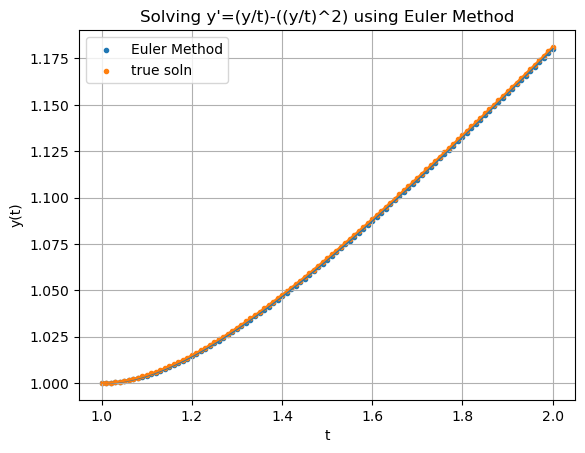

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def dydt(t,y):
    return (y/t)-((y/t)**2)

def euler_method(f,x0,xn,h,y0):
    # Number of steps
    n = int((xn - x0) / h)

    # Array to store x values
    x_vals = [x0]
    for i in range (n):
        x_vals.append(x_vals[i]+h)
        
    y_arr=np.zeros(len(x_vals))
    y_arr[0]=y0
    for i in range(len(x_vals)-1):
        y_arr[i+1]=y_arr[i]+(h*f(x_vals[i],y_arr[i]))
    return x_vals,y_arr

def true_sol(t):
    return t/(1+np.log(t))
x0 = 1
xn = 2
h = 0.01
y0 = 1

x_vals,y_arr=euler_method(dydt,x0,xn,h,y0)
true_sol=np.vectorize(true_sol)
y_true=true_sol(x_vals)
abs_err=np.abs(y_arr-y_true)
rel_err=np.divide(abs_err,y_true) 
ans_mat=np.column_stack((x_vals,y_arr,y_true,abs_err,rel_err))
df1=pd.DataFrame(ans_mat,columns=["t","y_euler","y_true","abs err","rel err"])
print(df1)


plt.plot(x_vals,y_arr)
plt.scatter(x_vals,y_arr,marker=".",label="Euler Method")
plt.plot(x_vals,y_true)
plt.scatter(x_vals,y_true,marker=".",label="true soln")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid()
plt.legend()
plt.title("Solving y'=(y/t)-((y/t)^2) using Euler Method")
plt.show()